In [2]:
import pandas as pd
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import IPython.display as display
from matplotlib import animation
import torch
from torch.utils.data import DataLoader
import copy
from torch import nn
%matplotlib inline
import matplotlib.pyplot as plt
import random
from scipy import stats as st
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=1)

In [3]:
class expermentDataloader(Dataset):
    def __init__(
        self,
        index_file: str, 
        data_path: str,
        startIndex = 0,
        endIndex = -1
    ):
        self.root_dir = data_path
        self.expermentSikeTrainsIndex = np.array(pd.read_csv(index_file,header=None))[startIndex:endIndex]
        self.spikeTrains = [
            f"{os.path.join(self.expermentSikeTrainsIndex[i][0])}" for i in range(len(self.expermentSikeTrainsIndex)) 
        ]
        self.targets = self.expermentSikeTrainsIndex[:, 1]

    def __getitem__(self, index):
        inputCSVlines = pd.read_csv(os.path.join(self.root_dir,self.spikeTrains[index]), header=None).to_numpy()
        targetCSVLines = self.targets[index]
        return inputCSVlines.flatten(), np.array([targetCSVLines])

    def __len__(self):
        return len(self.expermentSikeTrainsIndex)

In [4]:
datasetlow = expermentDataloader(
    "/home/khood/GitHub/SNN-DNA-project/Prepocessing/data/seperatedData/low/index.csv",
    "/home/khood/GitHub/SNN-DNA-project/Prepocessing/data/seperatedData/low", 
    startIndex=0, endIndex=70
)
datasetmedium = expermentDataloader(
    "/home/khood/GitHub/SNN-DNA-project/Prepocessing/data/seperatedData/medium/index.csv",
    "/home/khood/GitHub/SNN-DNA-project/Prepocessing/data/seperatedData/medium", 
    startIndex=0, endIndex=60)

datasetHigh = expermentDataloader(
    "/home/khood/GitHub/SNN-DNA-project/Prepocessing/data/seperatedData/high/index.csv",
    "/home/khood/GitHub/SNN-DNA-project/Prepocessing/data/seperatedData/high", 
    startIndex=0, endIndex=-1
)

print(f"datasetlow:{len(datasetlow)}")
print(f"datasetmedium:{len(datasetmedium)}")
print(f"datasetHigh:{len(datasetHigh)}")
print(f"Total: {len(datasetlow) + len(datasetmedium) + len(datasetHigh)}")

datasetlow:56
datasetmedium:16
datasetHigh:83
Total: 155


In [5]:
highTargets = [i[1][0] for i in datasetHigh]
mediumTargets = [i[1][0] for i in datasetmedium]
lowTargets = [i[1][0] for i in datasetlow]
highTargets

[339,
 296,
 303,
 283,
 337,
 301,
 305,
 342,
 310,
 321,
 321,
 298,
 392,
 328,
 379,
 340,
 340,
 285,
 274,
 285,
 282,
 105,
 51,
 297,
 191,
 352,
 238,
 80,
 303,
 167,
 103,
 107,
 184,
 379,
 55,
 89,
 484,
 535,
 262,
 113,
 501,
 196,
 179,
 488,
 165,
 327,
 710,
 135,
 87,
 167,
 133,
 258,
 635,
 224,
 53,
 538,
 462,
 311,
 187,
 219,
 57,
 34,
 165,
 446,
 175,
 219,
 363,
 243,
 375,
 413,
 210,
 155,
 342,
 252,
 55,
 234,
 336,
 248,
 90,
 93,
 228,
 61,
 280]

In [6]:
def printStats(data: list):
    print("+------------------")
    print(f"| total number of experments: {len(data)}")
    print(f"| min: {np.min(data)}")
    print(f"| max: {np.max(data)}")
    print(f"| average: {np.average(data)}")
    print(f"| median: {np.median(data)}")
    print(f"| mode: {st.mode(data, keepdims=False)}")
    print("+------------------")

High
+------------------
| total number of experments: 83
| min: 34
| max: 710
| average: 262.71084337349396
| median: 274.0
| mode: ModeResult(mode=55, count=2)
+------------------
Medium
+------------------
| total number of experments: 16
| min: 20
| max: 172
| average: 107.25
| median: 127.0
| mode: ModeResult(mode=132, count=2)
+------------------
Low
+------------------
| total number of experments: 56
| min: 13
| max: 93
| average: 35.42857142857143
| median: 30.5
| mode: ModeResult(mode=29, count=4)
+------------------


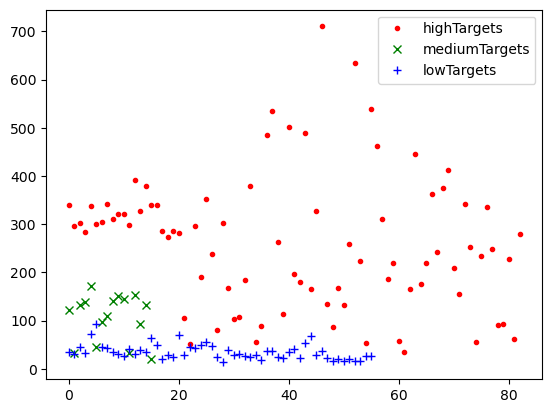

In [7]:
plt.plot(list(range(len(highTargets))), highTargets, '.', color='red', label="highTargets")
plt.plot(list(range(len(mediumTargets))), mediumTargets, 'x', color='green', label="mediumTargets")
plt.plot(list(range(len(lowTargets))), lowTargets, '+', color='blue', label="lowTargets")
plt.legend(numpoints=1)
print("High")
printStats(highTargets)
print("Medium")
printStats(mediumTargets)
print("Low")
printStats(lowTargets)

## Working with new data

- ran for 1 hour ~ 72000 frames